<a href="https://colab.research.google.com/github/Bilol2747/my_projects_data_science/blob/main/Analytic_texnik_topshiriq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Texnik topshiriq (TT) Data Analyst uchun
#Loyiha: Uyqu va turmush tarziga oid ma'lumotlarni tahlil qilish


1.Loyiha maqsadi

 Uyqu, jismoniy faollik, stress va boshqa sog‘liq ko‘rsatkichlariga oid ma'lumotlarni kompleks tahlil qilish, uyqu sifati va uyqu buzilishlariga (insomniya, apnoe) ta’sir qiluvchi asosiy omillar va qonuniyatlarni aniqlash.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#Ustunlar haqida malumot

Person ID – inson identifikatori

Gender – jinsi (Male/Female)

Age – yosh

Occupation – kasb

Sleep Duration – uyqu davomiyligi (soatlarda)

Quality of Sleep – uyqu sifati (1–10 shkalada)

Physical Activity Level – jismoniy faollik darajasi
(daqiqada/kun)

Stress Level – stress darajasi (1–10 shkalada)

BMI Category – BMI (tana massasi indeksi) toifasi
(Underweight, Normal, Overweight, Obese)

Blood Pressure – qon bosimi (sistolik/diastolik)

Heart Rate – yurak urish tezligi (urish/min)

Daily Steps – kundalik qadamlar soni

Sleep Disorder – uyqu buzilishi (None, Insomnia, Sleep Apnea)


#3.1. Dastlabki ma'lumotlarni tahlil qilish
Ma'lumotlarda bo'sh qiymatlar va dublikatlarni tekshirish.

Asosiy statistikani chiqarish (o‘rtacha, medianalar, taqsimotlar).

Blood Pressure ustunini Systolic va Diastolic ustunlariga ajratish.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
print(f"Bo'sh qiymatlar:\n {df.isnull().sum()}")
print(df.duplicated().sum())


Bo'sh qiymatlar:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
0


In [ ]:
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [ ]:
df[[ 'Systolic' ,  'Diastolic']]=df['Blood Pressure'].str.split("/", expand=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
df[[ 'Systolic' ,  'Diastolic']]=df[[ 'Systolic' ,  'Diastolic']].astype(int)

#3.2. Tadqiqot tahlili (EDA)
1.  	Asosiy ko‘rsatkichlar taqsimoti:
Quyidagilar uchun gistogrammalar qurish:

Sleep Duration

Quality of Sleep

Physical Activity Level

Stress Level


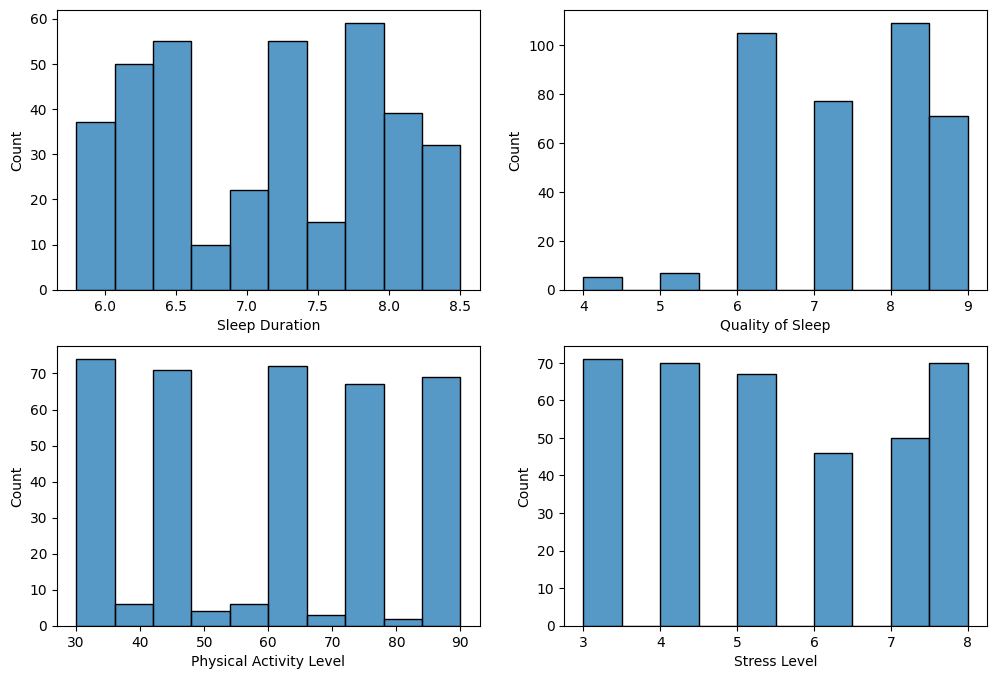

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(ax=ax[0,0], data=df, x='Sleep Duration')
sns.histplot(ax=ax[0 ,1], data=df, x= 'Quality of Sleep')
sns.histplot(ax=ax[1,0], data=df, x= 'Physical Activity Level')
sns.histplot(ax=ax[1,1], data=df, x= 'Stress Level')
plt.show()

#2.      Jins va kasblar bo‘yicha taqqoslash:

Jins bo‘yicha Sleep Duration va Quality of Sleep o‘rtacha qiymatlarini taqqoslash.

Kasblar bo‘yicha Sleep Duration uchun boxplot qurish.


In [ ]:
data1=df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()
print(data1)

        Sleep Duration  Quality of Sleep
Gender                                  
Female        7.229730          7.664865
Male          7.036508          6.968254


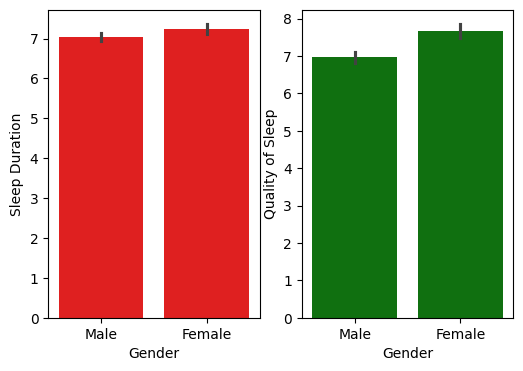

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(6, 4))

sns.barplot(ax=ax[0], data=df, y=df['Sleep Duration'] , x='Gender' , color='r')
sns.barplot(ax=ax[1], data=df, y=df['Quality of Sleep'], x='Gender', color='green' )
plt.show()

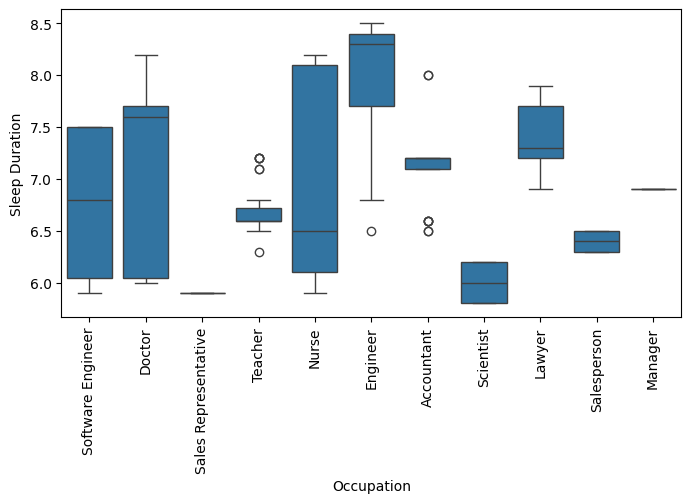

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Occupation', y='Sleep Duration')
plt.xticks(rotation=90)
plt.show()

#3.  	Korrelyatsion tahlil:
Raqamli o‘zgaruvchilar orasidagi korrelyatsiya heatmapini (issiqlik xaritasini) qurish.
Quyidagi bog‘liqliklarni tekshirish:

Sleep Duration va Quality of Sleep

Physical Activity Level va Quality of Sleep

Stress Level va Sleep Disorder


In [ ]:
pivot1=df.pivot_table(values='Sleep Duration', index='Quality of Sleep' )
pivot2=df.pivot_table(values='Physical Activity Level', index='Quality of Sleep')
pivot3= df.pivot_table(values='Stress Level', index='Sleep Disorder')

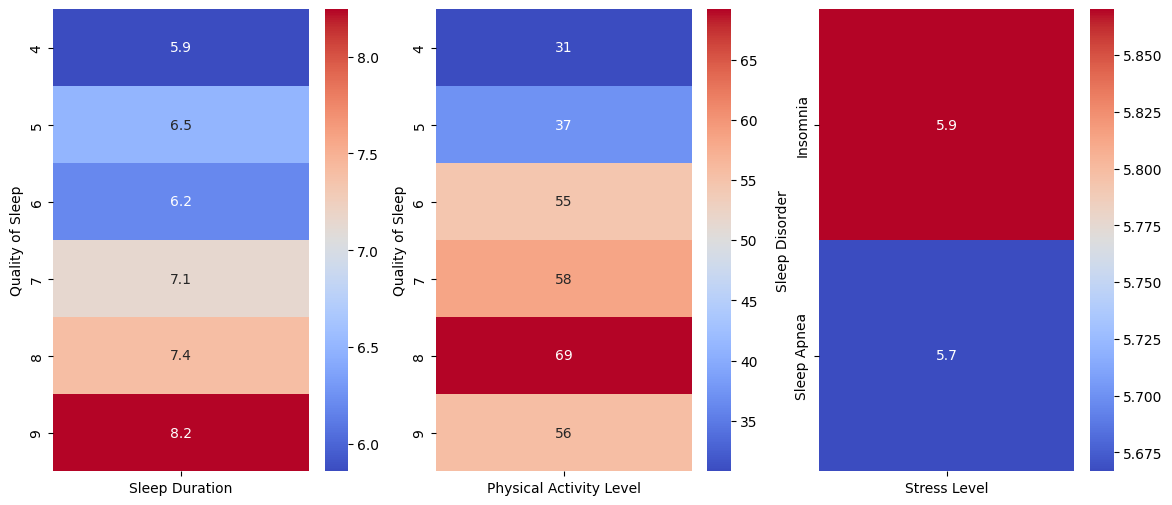

In [ ]:
fig, ax=plt.subplots(1, 3, figsize=(14, 6))
sns.heatmap(  pivot1, ax=ax[0],cmap='coolwarm', annot=True)
sns.heatmap( pivot2, ax=ax[1], cmap='coolwarm', annot=True)
sns.heatmap(  pivot3, ax=ax[2], cmap='coolwarm', annot=True)
plt.show()

#4.  	Uyqu buzilishlarini tahlil qilish:
Quyidagi guruhlar uchun Stress Level, BMI, Sleep Duration o‘rtacha qiymatlarini taqqoslash:

None (uyqu buzilishi yo‘q)

Insomnia

Sleep Apnea

Sleep Disorder kategoriyalari bo‘yicha Stress Level uchun boxplot qurish.


In [ ]:
new_data=df.groupby('Sleep Disorder')[['Stress Level',  'Sleep Duration']].mean()
print(new_data)

                Stress Level  Sleep Duration
Sleep Disorder                              
Insomnia            5.870130        6.589610
Sleep Apnea         5.666667        7.032051


<Axes: xlabel='Sleep Disorder', ylabel='Stress Level'>

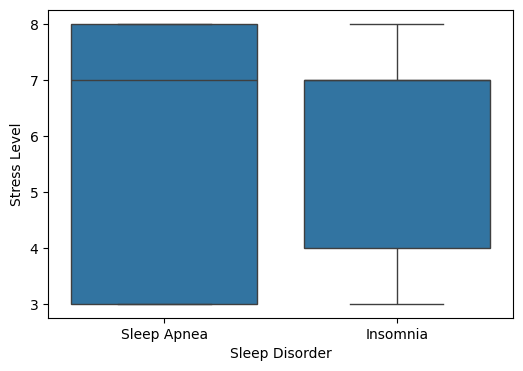

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Sleep Disorder', y='Stress Level')

#5.      BMI va qon bosimi ta’siri:
Quyidagi grafiklarni qurish:

BMI Category vs Quality of Sleep

Systolic Blood Pressure vs Quality of Sleep


In [ ]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80


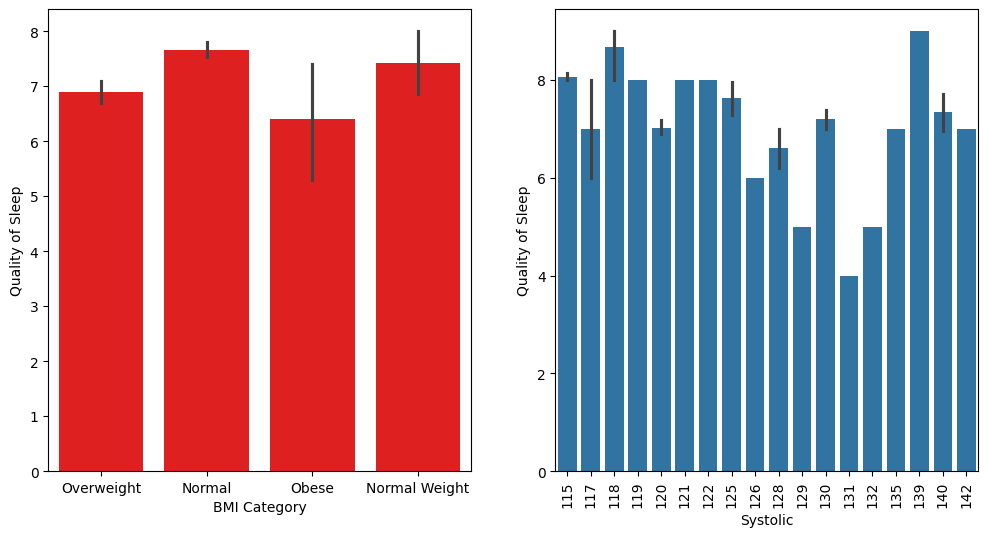

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(ax=ax[0], data=df, x='BMI Category', y='Quality of Sleep', color='red')
sns.barplot(ax=ax[1], data=df, x='Systolic', y='Quality of Sleep')
ax[1].tick_params(axis='x', rotation=90)
plt.show()